## Сорокин Вадим, 828


# Лабораторная работа 1.3. 
Рассеяние медленных электронов на атомах.



In [1]:
import numpy as np
import scipy as sp
import scipy.optimize
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image


### Цель работы:
получить ВАХ эффекта на экране ЭО, измерить расстояния между характерными точками в вольтах; снять ВАХ в статическом
режиме; по результатам измерений рассчитать размер электронной оболочки
атома, оценить глубину потенциальной ямы и потенциал ионизации газа, заполняющего лампу.

### Оборудование: 
Тиратрон ТГ3-01/1.3Б, заполненый инертным газом, осциллограф, блок источников питания, вольтметры В7-22А.

## Теоретическая справка
#### Эффект Рамзауэра
Эффективное сечение реакции - это величина, характеризующая вероятность перехода системы двух сталкивающихся частиц в результате их рассеяния (упругого или неупругого) в определенное конечное состояние. Сечение $\sigma$ это отношение числа таких переходов $N$ в единицу времени к плотности потока $nv$ рассеиваемых частиц, падающих на мишень, т.е. к числу частиц, попадающих в единицу времени на единичную площадку, перпендикулярную к их скорости.
	
\begin{equation}
		\sigma = \frac{N}{nv}
\end{equation}
	
Эффект Рамзауэра нельзя объяснить с позиций классической теории. С квантовой же точки зрения картина рассеяния выглядит следующим образом. Внутри атома потенциальная энергия налетающего электрона отлична от нуля, скорость электрона меняется, становясь равной $v'$ в соответсвии с законом сохранения энергии:
\begin{equation}
		E = \frac{mv^2}{2} = \frac{mv'^2}{2} + U
\end{equation}
	
а значит, изменяется и длина его волны де Бройля. Таким образом, по отношению к электронной волне атом ведет себя как преломляющая среда с относительным показателем преломления:
	
\begin{equation}
		n = \frac{\lambda}{\lambda'} = \sqrt{1 - \frac{U}{E}}
\end{equation}
	
Решение задачи о рассеянии электрона на сферическом потенциале достаточно громоздко. Поэтому рассмотрим более простое одномерное приближение: электрон рассеивается на потенциальной яме конечной глубины. Уравнение Шрёдингера в этом случае имеет вид:

\begin{equation}
		\psi'' + k^2\psi = 0, \text{   } \qquad k^2 = \begin{cases}
		 k_1^2  = \frac{2mE}{\hbar^2} \\
		 k_2 = \frac{2m(E+U_0)}{\hbar^2}
		\end{cases}
\end{equation}
	
Коэффициент прохождения равен отношению квадратов амплитуд прошедшей и падающей волн и определяется выражением:

\begin{equation}
		D = \frac{16k_1^2k_2^2}{16k_1^2k_2^2 + 4(k_1^2-k_2^2)^2\sin^2(k_2l)}
\end{equation}

или

\begin{equation}
		D^{-1} = 1 + \frac{U_0 ^2}{4E(E+U_0)) \sin^2{k_2 l}}
\end{equation}

Видно, что коэффициент прохождения частицы над ямой, в зависимости от её энергии, имеет вид чередующихся максимумов и минимумов. В частности, если $k_2l = \pi$, то коэффициент прохождения равен 1, т.е. отраженная волна отсутствует, и электрон беспрепятственно проходит через атом. Этот эффект является квантовым аналогом просветления оптики. Таким образом, коэффициент прохождения электронов максимален при условии:
\begin{equation}
		k_2l = \sqrt{\frac{2m(E_n+U_0)}{\hbar^2}}l = \pi \text{,  } n = 1, 2, 3, ...  
\end{equation}

Прошедшая волна 1 усилится волной 2, если геометрическая разность хода между ними $\Delta = 2l = \lambda'$, что соответствует условию первого интерференционного максимума, т.е.
\begin{equation}
		2l = \frac{h}{\sqrt{2m(E_1 + U_0)}}
\end{equation}
C другой стороны, прошедшая волна ослабится, если $2l = \frac{3}{2}\lambda'$, т.е.
	\begin{equation}
		2l = \frac{3}{2}\frac{h}{\sqrt{2m(E_2+U_0)}}
	\end{equation}
	Решая эти уравнения совместно можно исключить $U_0$ и найти эффективный размер атома $l$:
		\begin{equation}
			l = \frac{h\sqrt{5}}{\sqrt{32m(E_2-E_1)}}
		\end{equation}
	Понятно, что энергии $E_1$, $E_2$ соответсвуют энергиям электронов, прошедших разность потенциалов $V_1$ и $V_2$.
	Кроме того, можно оценить эффективную глубину потенциальной ямы атома:
    
\begin{equation}
		U_0 =\frac{4}{5}E_2 - \frac{9}{5}E_1
\end{equation}
    
Электроны, эмитируемые катодом, ускоряются напряжением V, приложенным между катодом и сеткой. Затем электроны рассеиваются на атомах инертного газа. Рассеянныеэлектроны отклоняются в сторону и уходятна сетку, а оставшаяся часть электронов достигает анода и создают анодный ток $I_a$. 

#### ВАХ тиратрона
Рассмотрим, какая должна быть реальная ВАХ тиратрона:
Выделим в газе слой на расстоянии $x$ от ускоряющей сетки ($n_a$ - концентрация атомов газа в лампе). Этот слой содержит 

\begin{equation}
\nu = n_a S dx
\end{equation}


атомов газа. Суммарная рассеивающая поверхность атомов: $\Delta = \nu \Delta_a$, $\Delta_a$ - площадь поперечного сечения атома.

Вероятность рассеяния электрона в слое равня произведению двух вероятностей: вероятности для электрона в слое $dx$ встретить атом газа и вероятности рассеяния на атоме $w (V)$:

\begin{equation}
-\frac{dN}{N(x)} = \frac{\Delta}{S} \cdot w (V) = n_a \Delta_a w (V) dx
\end{equation}

Проинтегрируем выражение от $0$ до $L$, получим:

\begin{equation}
I_a = I_0 \exp{-C w(V)}, \text{   }  C = Ln_a \Delta_a
\end{equation}


где $I_0 = eN_0$ - ток катода, $I_a = eN_a$ - анодный ток.


Согласно классическим представлениям, сечение рассения должно падать монотонно с ростом $V$ (обратно пропорционально корню из его энергии). Характерный вид классической ВАХ представлен слева. По квантовым соображениям, вероятность рассеяния имеет вид, представленный на рисунке справа.

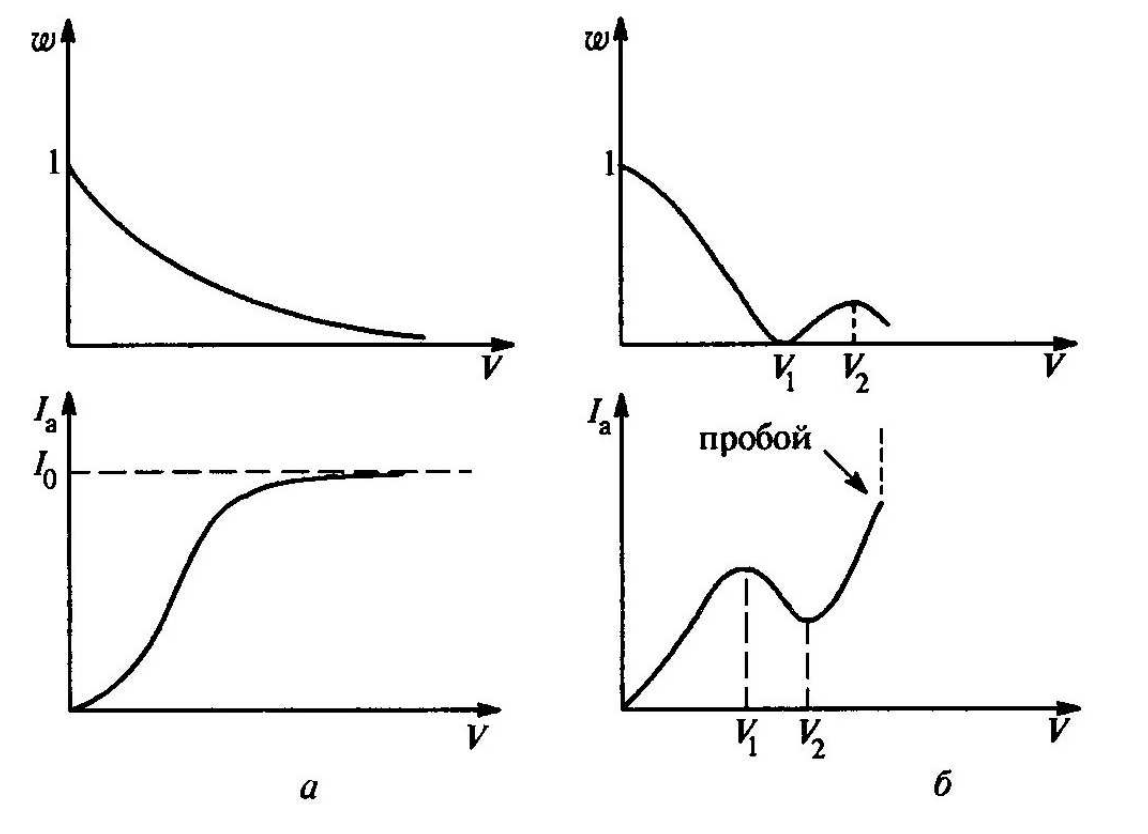

In [2]:
Image(filename='1.png', width=400)

Согласно формуле (3), по измеренной ВАХ тиратрона можно определить зависимость вероятности рассеяния электрона от его энергии:


\begin{equation}
w(V) =  - \frac{1}{C}\ln\frac{I_a (V)}{I_0}
\end{equation}




### Схема экспериментальной установки 

Лампа-тиратрон $ТЗ01/1.3Б$, заполненная инертным газом, расположена непосредственно на корпусе блока источников питания (БИП). Напряжение к электродам лампы подаются от источников питания, находящихся в корпусе прибора. Регулировка напряжения и выбор режима работы установки производится при помощи ручек управления,
выведенных на лицевую панель БИП.

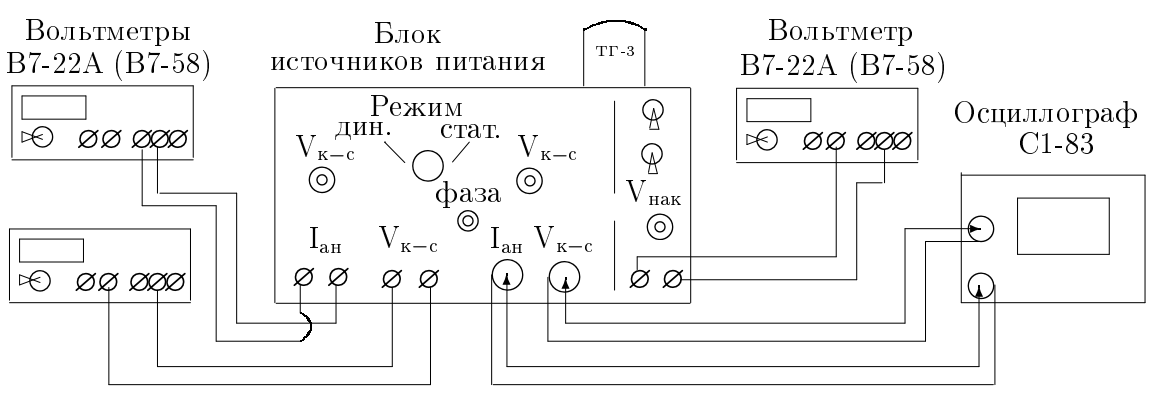

In [3]:
Image(filename='2.png', width=500)

## Ход работы

### Измерения в динмическом режиме

Подадим сигнал $V_{катод-сетка}$ на вход $X$ осциллографа, а с выхода $I_{анода}$ - на вход $Y$. Проследим за картинкой на экрасне осциллографа в режиме $XY$ при различных напряжениях накала.

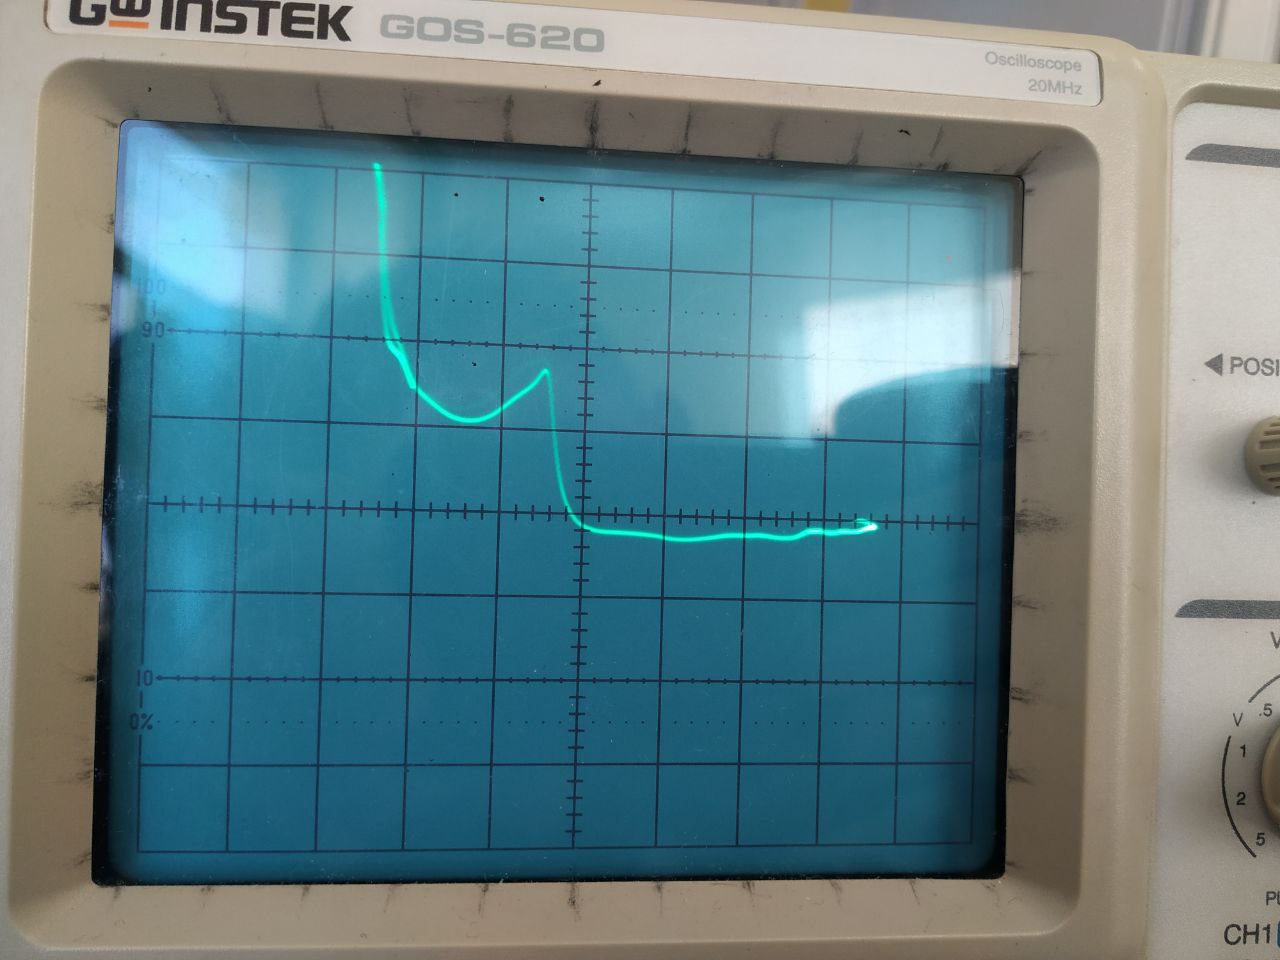

In [4]:
Image(filename='3.jpeg', width=400)

$V_{накала}= 3.38 V$:

In [5]:
V_max1 = 2.2  # V
V_min1 = 7.0  # V
V_br1 = 11  # V

$V_{накала}= 3V$:

In [6]:
V_max2 = 2.4  # V
V_min2 = 7.0  # V
V_br2 = 11  # V

Напряжение пробоя приблизительно составляет $U_{br} = 11V$, следовательно, наш газ - ксенон.

###  ВАХ $I_a=f(U_c)$ в статическом режиме

Проведем измерение ВАХ тиратрона для 2-х значений напряжения накала (тех же, что и в динамическом режиме).

Анодный ток считаем по формуле:

\begin{equation}
I_a = \frac{V_a}{R_0}
\end{equation}

где $R_0 = 100k\Omega$

In [7]:
R0 = 1e5 # 100 кОм

#### $V_{накала}= 3.38 V$:

In [8]:
data1 = pd.read_csv('./data/data1.csv')

In [9]:
data1['$V_a$'] *= 1e-3
data1['$I_a$, A'] = data1['$V_a$'] / R0
data1


,$V_a$,V,"$I_a$, A"
0,0.00003,0.000,3.000000e-10
1,0.00003,0.200,3.000000e-10
2,0.00003,0.400,3.000000e-10
3,0.00000,0.600,0.000000e+00
4,0.00000,0.800,0.000000e+00
5,0.00018,1.000,1.800000e-09
6,0.00145,1.205,1.450000e-08
7,0.00150,1.400,1.500000e-08
8,0.01069,1.606,1.069000e-07
9,0.03975,1.798,3.975000e-07


Построим зависимость $I_a=f(U_c)$:

Text(0.5, 1.0, '$V_{накала}= 3.38 V$')

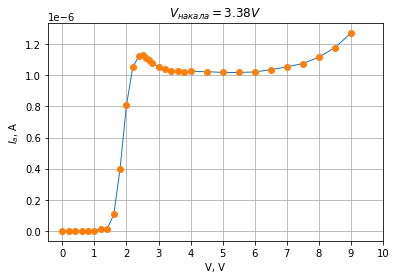

In [189]:
plt.plot(data1['V'], data1['$I_a$, A'], '-', linewidth=1)
plt.plot(data1['V'], data1['$I_a$, A'], 'o')
plt.grid()   
plt.xlabel('V, V')
plt.ylabel('$I_a$, A')
ticks1 = plt.xticks(np.arange(0, 11, 1))

plt.title("$V_{накала}= 3.38 V$")


#### $V_{накала}= 3.0 V$:

In [14]:
data2 = pd.read_csv('./data/data2.csv')

In [15]:
data2['$V_a$'] *= 1e-3
data2['$I_a$, A'] = data2['$V_a$'] / R0
data2



,$V_a$,V,"$I_a$, A"
0,0.00000,0.080,0.000000e+00
1,0.00007,1.200,7.000000e-10
2,0.00043,1.392,4.300000e-09
3,0.00377,1.602,3.770000e-08
4,0.01960,1.802,1.960000e-07
5,0.06005,2.017,6.005000e-07
6,0.07642,2.112,7.642000e-07
7,0.09127,2.234,9.127000e-07
8,0.09678,2.327,9.678000e-07
9,0.09880,2.417,9.880000e-07


Построим зависимость $I_a=f(U_c)$:

Text(0.5, 1.0, '$V_{накала}= 3.0 V$')

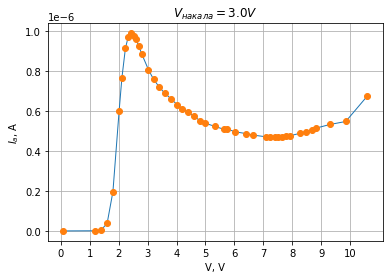

In [191]:
plt.plot(data2['V'], data2['$I_a$, A'], '-', linewidth=1) 
ui = plt.plot(data2['V'], data2['$I_a$, A'], 'o')
plt.grid()  
plt.xlabel('V, V')
plt.ylabel('$I_a$, A')
ticks1 = plt.xticks(np.arange(0, 11, 1)) 

plt.title("$V_{накала}= 3.0 V$")





### Обработка результатов

По результатам измерений в <span class="mark">дин. режиме</span> рассчитаем размер электронной оболочки атома инертного газа, заполняющего лампу, по формуле

\begin{equation}
	l = \frac{h\sqrt{5}}{\sqrt{32m(E_2-E_1)}}
\end{equation}

Также оценим характерную глубину потенциальной ямы:
\begin{equation}
		U_0 =\frac{4}{5}E_2 - \frac{9}{5}E_1
\end{equation}

In [121]:
h = sp.constants.h
e = sp.constants.e
m = sp.constants.m_e 


In [ ]:
l1 = h * np.sqrt(5 / (32 * m * e * (V_min1 - V_max1)))
l2 = h * np.sqrt(5 / (32 * m * e * (V_min2 - V_max2)))

U0_1 = 4 / 5 * V_min1 - 9 / 5 * V_max1
U0_2 = 4 / 5 * V_min2 - 9 / 5 * V_max2


In [195]:
pd.DataFrame({'$U_{накала}\text{,V}$': [3.38, 3],
                '$l, Å$': np.round(np.array([l1, l2]) * 1e10, 2),
             '$U_0, eV$': [U0_1, U0_2]}) 

,"$U_{накала}\text{,V}$","$l, Å$","$U_0, eV$"
0,3.38,3.13,1.64
1,3.00,3.20,1.28


Аналогично для <span class="mark">статического режима:</span>

Проведем интерполяцию и найдем минимумы и максимумы ВАХ.



In [61]:
from scipy.interpolate import interp1d
import scipy.optimize 


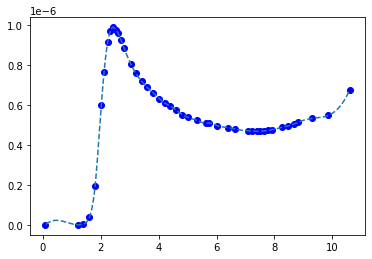

In [131]:
plt.plot(data2['V'], data2['$I_a$, A'], 'bo')
f = interp1d(data2['V'], data2['$I_a$, A'], kind='cubic')
xnew = np.linspace(0+0.1, np.max(data2['V'])-0.001, 10000)
plt.plot(xnew, f(xnew), '--')




In [135]:
# V_накала = 3V
f2 = interp1d(data2['V'], data2['$I_a$, A'], kind='cubic')
V_max2_stat, V_min2_stat = (sp.optimize.fmin(lambda x: -f2(x), 2),
                            sp.optimize.fmin(f2, 7.42))

# V_накала = 3.38V
f1 = interp1d(data1['V'], data1['$I_a$, A'], kind='cubic')
V_max1_stat, V_min1_stat = (sp.optimize.fmin(lambda x: -f1(x), 2),
                            sp.optimize.fmin(f1, 7.42))


Optimization terminated successfully.
         Current function value: -0.000001
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: -0.000001
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 17
         Function evaluations: 34


In [182]:
l1_stat = h * np.sqrt(5 / (32 * m * e * (V_min1_stat - V_max1_stat)))
l2_stat = h * np.sqrt(5 / (32 * m * e * (V_min2_stat - V_max2_stat)))

U0_1_stat = 4 / 5 * V_min1_stat - 9 / 5 * (V_max1_stat)
U0_2_stat = 4 / 5 * V_min2_stat - 9 / 5 * V_max2_stat



In [196]:
pd.DataFrame({'$U_{накала}\text{,V}$': [3.38, 3],
              '$l, Å$': np.round(np.array([l1_stat[0], l2_stat[0]]) * 1e10, 2),
             '$U_0, eV$': [U0_1_stat[0], U0_2_stat[0]]})                  
                 

,"$U_{накала}\text{,V}$","$l, Å$","$U_0, eV$"
0,3.38,4.12,-0.249904
1,3.00,3.07,1.578221


Оценим характерную глубину потенциальной ямы:
\begin{equation}
U_0 = (1.57 \pm 0.12) eV
\end{equation}

Оценим, используя формулу $(7)$, выразив $E_n = f(E_1, n)$, при каких напряжениях должны появляться максимумы в коэффициенте прохождения электронов для $n=2, 3$:

\begin{equation}
E_n = n^2 (E_1 + U_0) - U_0
\end{equation}

In [184]:
U_0 = 1.578221
E_1 = np.mean([V_max1_stat, V_max2_stat])
E_2 = 2 ** 2 * (E_1 + U_0) - U_0
E_3 = 3 ** 2 * (E_1 + U_0) - U_0
E_2, E_3


(14.510248937500005, 34.62083635937501)

\begin{equation}
E_2 = (14.5 \pm 1.3) eV
\end{equation}

\begin{equation}
E_3 = (34.6 \pm 3.0) eV
\end{equation}

На основе формулы для вероятности рассеяния электрона построим график этой вероятности в зависимости от анодного напряжения:

/usr/local/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, '$w(V)$')

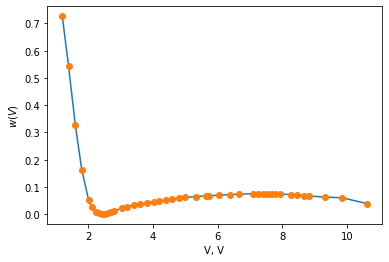

In [185]:
w = -1/10 * np.log(data2['$I_a$, A']/1e-6)
plt.plot(data2['V'], w)
plt.plot(data2['V'], w, 'o')
plt.xlabel('V, V')
plt.ylabel('$w(V)$')